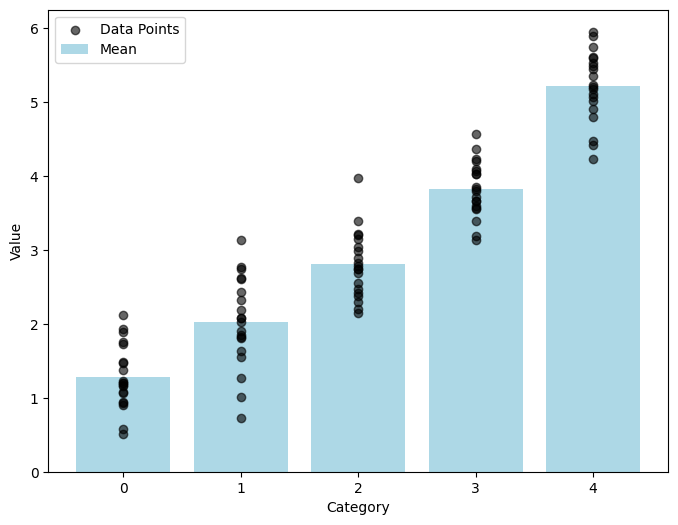

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(0)
data = [np.random.normal(loc, 0.5, 20) for loc in [1, 2, 3, 4, 5]]

# Calculate means
means = [np.mean(d) for d in data]

# Plot
plt.figure(figsize=(8, 6))

# Bar plot for means
plt.bar(range(len(means)), means, color='lightblue', label='Mean')

# Scatter plot for individual data points
for i, d in enumerate(data):
    plt.scatter([i] * len(d), d, color='black', alpha=0.6, label='Data Points' if i == 0 else "")

plt.xlabel('Category')
plt.ylabel('Value')
plt.legend()
plt.show()


In [2]:
np.shape(data)

(5, 20)

In [3]:
pwd

'm:\\Documents\\repos\\PRESTUS_forked\\scripts'

In [4]:
import os
from pathlib import Path
import pandas as pd

data_path = "../data/sims/"

files = [Path(data_path)/f for f in os.listdir(data_path) if f.startswith("acoustic_results_subj")]
dfs = []
for f in files:
    dfs.append(pd.read_csv(f))
df = pd.concat(dfs)
df = df.reset_index(drop=True)
df.sample(5)

,Row,sub_id,skin,skull,brain,brain_inner,targetL,targetR,ROItarget_L_max,ROItarget_R_max,ROItarget_L_avg,ROItarget_R_avg
25,intensity__L+y--r_R+y--r_,6,17.118950,7.241894,10.982680,10.982680,0.937783,7.429523,8.436017,9.560359,3.822024,3.542031
19,intensity__L+y--l_R+y--l_var3,6,36.769630,13.139550,9.485940,9.485940,1.378435,3.492952,7.473084,6.345258,2.313214,1.862566
4,intensity__L+y--l_R+y--r_var1,6,31.783500,14.775920,8.683572,8.683572,1.322822,4.432271,7.876241,6.383006,3.609192,2.618096
28,intensity__L+y--r_R+y--r_var1,6,15.349350,6.652018,10.375210,10.375210,1.233197,4.074077,7.393042,9.200972,3.180218,3.360930
26,mechanicalindex__L+y--r_R+y--r_,6,1.417213,0.866807,1.089098,1.089098,0.338531,0.900359,0.954993,1.020714,0.608521,0.559596


In [5]:
# clean the data: add more rows & make sure everything is balanced

# add variable if 0 (bilateral), target left (-1), target right (1)
import re

def get_dir(s):
    if bool(re.search(r"L.*--l.*R.*--r", s)): return "bilateral"
    if bool(re.search(r"L.*--l.*R.*--l", s)): return "unilateral left"
    if bool(re.search(r"L.*--r.*R.*--r", s)): return "unilateral right"
    return 999

df["dir"] = [get_dir(s) for s in df["Row"]]
df.sample(5)

,Row,sub_id,skin,skull,brain,brain_inner,targetL,targetR,ROItarget_L_max,ROItarget_R_max,ROItarget_L_avg,ROItarget_R_avg,dir
17,mechanicalindex__L+y--l_R+y--l_var1,6,1.938303,1.267724,1.067928,1.067928,0.342639,0.737736,0.984784,0.807792,0.612945,0.485283,unilateral left
13,intensity__L+y--l_R+y--r_,6,33.735110,13.398660,9.736901,9.736901,1.128419,6.700905,9.400931,7.619411,3.701277,2.893016,bilateral
15,pressure__L+y--l_R+y--l_var1,6,1.061652,0.694361,0.584928,0.584928,0.187671,0.404075,0.539388,0.442446,0.335724,0.265800,unilateral left
8,mechanicalindex__L+y--l_R+y--r_var3,6,2.066806,1.232338,0.933278,0.930485,0.333498,0.647848,0.871929,0.870677,0.453851,0.443570,bilateral
0,pressure__L+y--l_R+y--l_,6,1.096484,0.703399,0.609224,0.609224,0.204487,0.448922,0.609224,0.484675,0.338279,0.270181,unilateral left


In [6]:
# make separate tables for output vars

# Split into 3 DataFrames based on keyword in "Row"
df_pressure         = df[df["Row"].str.contains("pressure")]
df_intensity        = df[df["Row"].str.contains("intensity")]
df_mechanicalindex  = df[df["Row"].str.contains("mechanicalindex")]

df_mechanicalindex.sample(5)

,Row,sub_id,skin,skull,brain,brain_inner,targetL,targetR,ROItarget_L_max,ROItarget_R_max,ROItarget_L_avg,ROItarget_R_avg,dir
35,mechanicalindex__L+y--r_R+y--r_var5,6,1.311256,1.118810,1.068771,1.068771,0.437799,0.760600,0.916955,1.063863,0.564407,0.602239,unilateral right
29,mechanicalindex__L+y--r_R+y--r_var1,6,1.342690,0.873233,1.029433,1.029433,0.369041,0.663736,0.893406,1.000087,0.561478,0.551798,unilateral right
11,mechanicalindex__L+y--l_R+y--r_var5,6,1.921546,1.267205,0.958973,0.958973,0.280165,0.790255,0.860985,0.904324,0.497452,0.511570,bilateral
5,mechanicalindex__L+y--l_R+y--r_var1,6,1.929840,1.298989,0.962366,0.962366,0.389308,0.689405,0.922890,0.834007,0.594072,0.503271,bilateral
23,mechanicalindex__L+y--l_R+y--l_var5,6,1.927215,1.270025,0.968590,0.968590,0.173815,0.816015,0.915951,0.907185,0.553319,0.513363,unilateral left


In [7]:
def restructure_to_long(df_):
    # Step 1: Select only the relevant columns
    df_ = df_[['Row', 'sub_id', 'targetL', 'targetR', 'ROItarget_L_max', 'ROItarget_R_max', 'ROItarget_L_avg', 'ROItarget_R_avg', 'dir']]

    # Step 2: Rename columns to have consistent suffixes ('_L' and '_R')
    df_ = df_.rename(columns={
        'targetL': 'target_L',
        'targetR': 'target_R',
        'ROItarget_L_max': 'ROItarget_max_L',
        'ROItarget_R_max': 'ROItarget_max_R',
        'ROItarget_L_avg': 'ROItarget_avg_L',
        'ROItarget_R_avg': 'ROItarget_avg_R'
    })

    # Step 3: Melt the DataFrame to long format
    id_vars = ['Row', 'sub_id', 'dir']
    value_vars = [col for col in df_.columns if col not in id_vars]
    df_long = pd.melt(df_, id_vars=id_vars, value_vars=value_vars, var_name='variable', value_name='value')

    # Step 4: Extract the variable names and 'Side' (L/R) from the 'variable' column
    df_long[['variable_name', 'Side']] = df_long['variable'].str.rsplit('_', n=1, expand=True)

    # Step 5: Pivot the DataFrame to get variables as columns
    df_long = df_long.pivot_table(index=['Row', 'sub_id', 'Side', 'dir'], columns='variable_name', values='value').reset_index()

    # Optional: Reorder columns if necessary
    df_long = df_long[['Row', 'sub_id', 'Side', 'target', 'ROItarget_avg', 'ROItarget_max', 'dir']]

    # Now 'df_long' is your DataFrame in long format
    return df_long


In [8]:
df_p_long = restructure_to_long(df_pressure)
df_i_long = restructure_to_long(df_intensity)
df_MI_long = restructure_to_long(df_mechanicalindex)
df_MI_long.sample(6)

variable_name,Row,sub_id,Side,target,ROItarget_avg,ROItarget_max,dir
14,mechanicalindex__L+y--l_R+y--r_var5,6,L,0.280165,0.497452,0.860985,bilateral
6,mechanicalindex__L+y--l_R+y--l_var5,6,L,0.173815,0.553319,0.915951,unilateral left
9,mechanicalindex__L+y--l_R+y--r_,6,R,0.853625,0.518693,0.910667,bilateral
0,mechanicalindex__L+y--l_R+y--l_,6,L,0.373341,0.617610,1.112285,unilateral left
21,mechanicalindex__L+y--r_R+y--r_var3,6,R,0.734179,0.466139,0.933342,unilateral right
18,mechanicalindex__L+y--r_R+y--r_var1,6,L,0.369041,0.561478,0.893406,unilateral right


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

def plot_barscatter(df_, label, DV):
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    # Plot the barplot without error bars
    sns.barplot(
        data=df_,
        x="dir",
        y=DV,
        hue="Side",
        errorbar=None,  # Remove error bars
        palette="dark",
        alpha=.25,
        ax=ax,
        legend=False
    )

    # Overlay the individual data points using a stripplot
    sns.stripplot(
        data=df_,
        x="dir",
        y=DV,
        hue="Side",
        dodge=True,
        palette="dark",
        alpha=0.6,
        ax=ax,
        legend=False  # Prevent duplicate legends
    )

    # Adjust the legend to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title="Side")

    # Set the labels
    ax.set_xlabel("")
    ax.set_ylabel(label)

    plt.show()


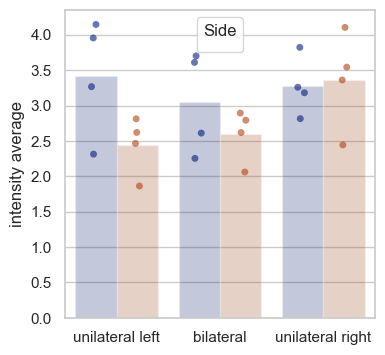

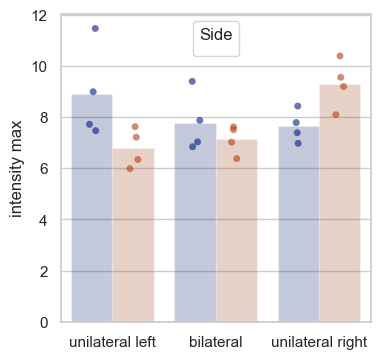

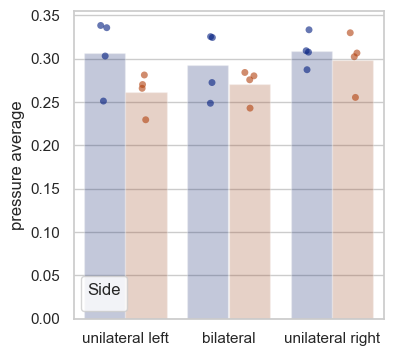

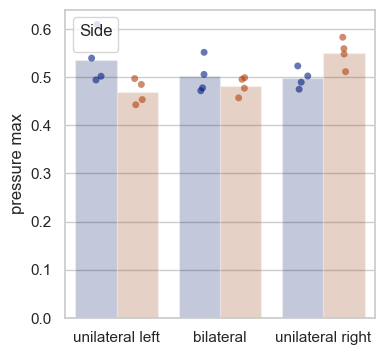

In [10]:
plot_barscatter(df_i_long, "intensity average", "ROItarget_avg")
plot_barscatter(df_i_long, "intensity max", "ROItarget_max")
plot_barscatter(df_p_long, "pressure average", "ROItarget_avg")
plot_barscatter(df_p_long, "pressure max", "ROItarget_max")